In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import *


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FIREBLZE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv('spam_ham_dataset.csv')


In [5]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S+|[^A-Za-z0-9]:\S+|subject:\S+|nbsp"
def preprocess(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

data.text = data.text.apply(lambda x: preprocess(x))
data.head()

data = data.drop(['Unnamed: 0', 'label'], axis=1)
data = data.rename(columns = {"label_num" : "Label"})

In [6]:
x = data['text']
y = data['Label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
                                         random_state=7)
print("Train Data size:", len(x_train))
print("Test Data size", len(x_test))

Train Data size: 3878
Test Data size 1293


In [7]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1000
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 43372


In [8]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(x_train),
                        maxlen = 50)
x_test = pad_sequences(tokenizer.texts_to_sequences(x_test),
                       maxlen = 50)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (3878, 50)
Testing X Shape: (1293, 50)


In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
ann = Sequential()
ann.add(Dense(40, activation='relu'))
ann.add(Dense(45, activation='relu'))

# Adding dropout to prevent overfitting
ann.add(Dropout(0.1))
ann.add(Dense(1, activation='sigmoid'))

In [10]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = ann.fit(x_train, y_train,
                  batch_size=35,
                  epochs=100,
                  verbose=2
                  ,
                  validation_data=(x_test, y_test))

Epoch 1/100
111/111 - 0s - loss: 501.4810 - accuracy: 0.5936 - val_loss: 256.7834 - val_accuracy: 0.6342
Epoch 2/100
111/111 - 0s - loss: 244.4277 - accuracy: 0.6485 - val_loss: 189.8436 - val_accuracy: 0.6582
Epoch 3/100
111/111 - 0s - loss: 158.5407 - accuracy: 0.6547 - val_loss: 150.8145 - val_accuracy: 0.6326
Epoch 4/100
111/111 - 0s - loss: 111.6096 - accuracy: 0.6692 - val_loss: 135.1086 - val_accuracy: 0.6489
Epoch 5/100
111/111 - 0s - loss: 84.1136 - accuracy: 0.6841 - val_loss: 103.8781 - val_accuracy: 0.6133
Epoch 6/100
111/111 - 0s - loss: 65.4286 - accuracy: 0.6919 - val_loss: 104.1227 - val_accuracy: 0.6752
Epoch 7/100
111/111 - 0s - loss: 52.8635 - accuracy: 0.6973 - val_loss: 89.9227 - val_accuracy: 0.6543
Epoch 8/100
111/111 - 0s - loss: 43.5618 - accuracy: 0.7094 - val_loss: 77.0110 - val_accuracy: 0.6342
Epoch 9/100
111/111 - 0s - loss: 36.7514 - accuracy: 0.7068 - val_loss: 70.8473 - val_accuracy: 0.6450
Epoch 10/100
111/111 - 0s - loss: 29.9037 - accuracy: 0.7277 - 

Epoch 81/100
111/111 - 0s - loss: 0.4181 - accuracy: 0.8409 - val_loss: 3.3584 - val_accuracy: 0.7819
Epoch 82/100
111/111 - 0s - loss: 0.3964 - accuracy: 0.8424 - val_loss: 3.5341 - val_accuracy: 0.7641
Epoch 83/100
111/111 - 0s - loss: 0.4066 - accuracy: 0.8471 - val_loss: 3.4144 - val_accuracy: 0.7703
Epoch 84/100
111/111 - 0s - loss: 0.3788 - accuracy: 0.8448 - val_loss: 3.4869 - val_accuracy: 0.7610
Epoch 85/100
111/111 - 0s - loss: 0.3532 - accuracy: 0.8540 - val_loss: 3.5450 - val_accuracy: 0.7742
Epoch 86/100
111/111 - 0s - loss: 0.3685 - accuracy: 0.8525 - val_loss: 2.9926 - val_accuracy: 0.7726
Epoch 87/100
111/111 - 0s - loss: 0.3528 - accuracy: 0.8651 - val_loss: 3.9083 - val_accuracy: 0.7858
Epoch 88/100
111/111 - 0s - loss: 0.3472 - accuracy: 0.8651 - val_loss: 4.9876 - val_accuracy: 0.7773
Epoch 89/100
111/111 - 0s - loss: 0.3296 - accuracy: 0.8662 - val_loss: 5.0424 - val_accuracy: 0.7842
Epoch 90/100
111/111 - 0s - loss: 0.3292 - accuracy: 0.8711 - val_loss: 4.9884 - v

In [11]:
from sklearn.metrics import precision_recall_curve
y_pred=ann.predict_proba(x_test)
p = precision_recall_curve(y_test,y_pred)

Instructions for updating:
Please use `model.predict()` instead.


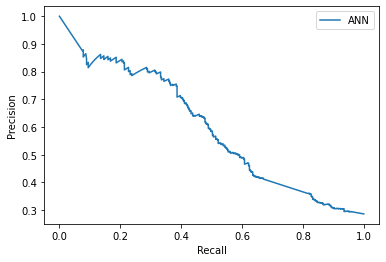

In [12]:
plt.plot(p[1], p[0], label='ANN')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()